In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [46]:
data = pd.read_csv("./data/credit_risk_dataset.csv")
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [47]:
data.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [49]:
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


## Data Preprocessing

In [50]:
for label, content in data.items():
    if pd.api.types.is_string_dtype(content) or  pd.api.types.is_object_dtype(content):
        print(label)

person_home_ownership
loan_intent
loan_grade
cb_person_default_on_file


In [51]:
for label, content in data.items():
    if pd.api.types.is_string_dtype(content) or pd.api.types.is_object_dtype(content):
        data[label] = content.astype("category").cat.as_ordered()

In [52]:
data["person_home_ownership"].value_counts()

RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: person_home_ownership, dtype: int64

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   person_age                  32581 non-null  int64   
 1   person_income               32581 non-null  int64   
 2   person_home_ownership       32581 non-null  category
 3   person_emp_length           31686 non-null  float64 
 4   loan_intent                 32581 non-null  category
 5   loan_grade                  32581 non-null  category
 6   loan_amnt                   32581 non-null  int64   
 7   loan_int_rate               29465 non-null  float64 
 8   loan_status                 32581 non-null  int64   
 9   loan_percent_income         32581 non-null  float64 
 10  cb_person_default_on_file   32581 non-null  category
 11  cb_person_cred_hist_length  32581 non-null  int64   
dtypes: category(4), float64(3), int64(5)
memory usage: 2.1 MB


In [54]:
for label, content in data.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            data[label] = content.fillna(content.median())

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   person_age                  32581 non-null  int64   
 1   person_income               32581 non-null  int64   
 2   person_home_ownership       32581 non-null  category
 3   person_emp_length           32581 non-null  float64 
 4   loan_intent                 32581 non-null  category
 5   loan_grade                  32581 non-null  category
 6   loan_amnt                   32581 non-null  int64   
 7   loan_int_rate               32581 non-null  float64 
 8   loan_status                 32581 non-null  int64   
 9   loan_percent_income         32581 non-null  float64 
 10  cb_person_default_on_file   32581 non-null  category
 11  cb_person_cred_hist_length  32581 non-null  int64   
dtypes: category(4), float64(3), int64(5)
memory usage: 2.1 MB


In [56]:
for label, content in data.items():
    if not pd.api.types.is_numeric_dtype(content):
        data[label] = pd.Categorical(content).codes + 1 

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  int8   
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  int8   
 5   loan_grade                  32581 non-null  int8   
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  int8   
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), int8(4)
memory usage: 2.1 MB


In [58]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,4,123.0,5,4,35000,16.02,1,0.59,2,3
1,21,9600,3,5.0,2,2,1000,11.14,0,0.10,1,2
2,25,9600,1,1.0,4,3,5500,12.87,1,0.57,1,3
3,23,65500,4,4.0,4,3,35000,15.23,1,0.53,1,2
4,24,54400,4,8.0,4,3,35000,14.27,1,0.55,2,4


In [59]:
data.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [60]:
X = data.drop("loan_status", axis=1)
y = data["loan_status"]

In [61]:
X.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,4,123.0,5,4,35000,16.02,0.59,2,3
1,21,9600,3,5.0,2,2,1000,11.14,0.10,1,2
2,25,9600,1,1.0,4,3,5500,12.87,0.57,1,3
3,23,65500,4,4.0,4,3,35000,15.23,0.53,1,2
4,24,54400,4,8.0,4,3,35000,14.27,0.55,2,4


In [62]:
y.head

<bound method NDFrame.head of 0        1
1        0
2        1
3        1
4        1
        ..
32576    0
32577    0
32578    1
32579    0
32580    0
Name: loan_status, Length: 32581, dtype: int64>

In [63]:
X.shape , y.shape

((32581, 11), (32581,))

In [64]:
data.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

## Data Visualization

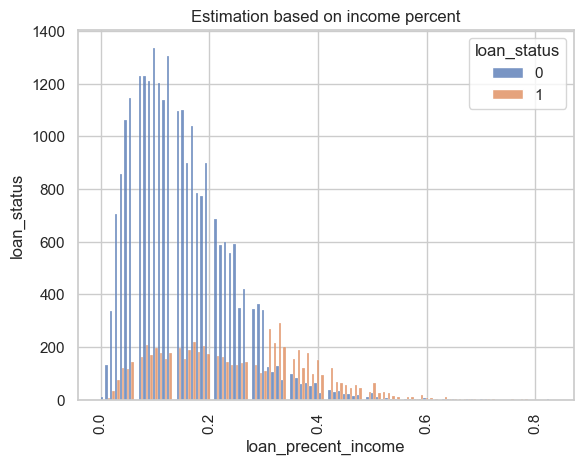

In [65]:
import seaborn as sns

sns.set_theme(style="whitegrid")
sns.histplot( data, x="loan_percent_income", hue="loan_status", multiple="dodge")
plt.xticks(rotation=90)
plt.xlabel("loan_precent_income")
plt.ylabel("loan_status")
plt.title("Estimation based on income percent")
plt.show()

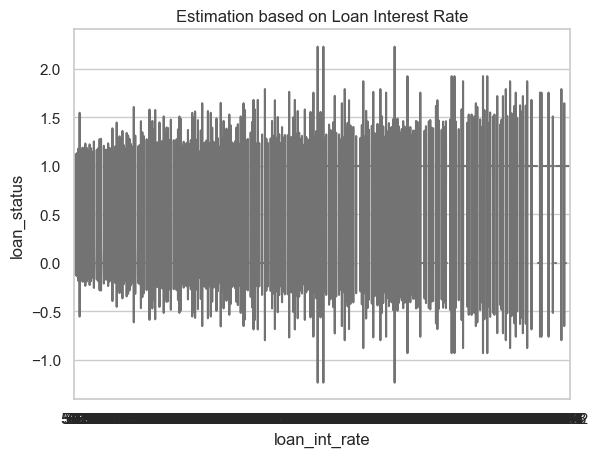

In [66]:
colors = ["lightblue", "lightgreen"]

sns.violinplot(data=data, x='loan_int_rate', y= "loan_status" , inner='quartile', palette=colors)
plt.title("Estimation based on Loan Interest Rate")
plt.xlabel("loan_int_rate")
plt.ylabel("loan_status")

plt.show()

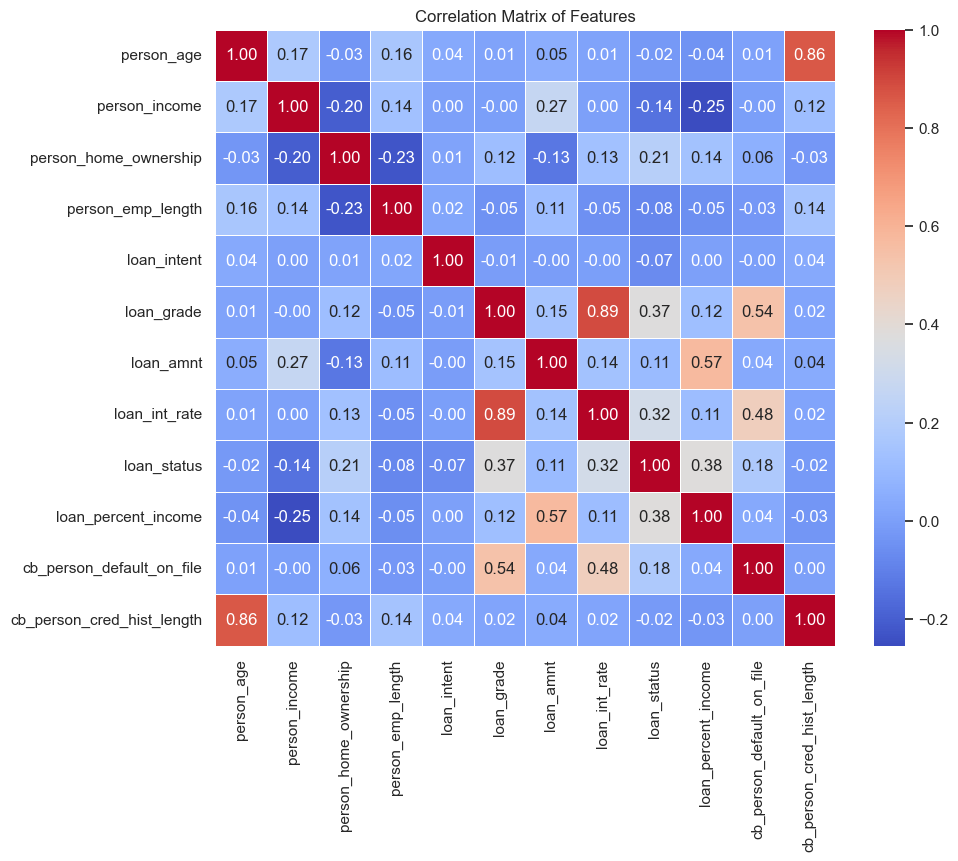

In [67]:
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

## Data Modelling

In [68]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier

X_train, X_test , y_train , y_test = train_test_split(X, y , test_size=0.2, random_state=42) 

model = RandomForestClassifier(n_estimators= 300, min_samples_split= 2, min_samples_leaf= 1, max_depth= 20, bootstrap= False)

model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=300)

In [69]:
y_preds = model.predict(X_test)
y_preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [70]:
np.array(y_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [71]:
model.score(X_train, y_train)

0.9952041129527317

In [72]:
model.score(X_test, y_test)

0.9291084854994629

In [73]:
from sklearn.model_selection import cross_val_score

In [74]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_preds)

# Print the accuracy score
print("Accuracy:", accuracy)

Accuracy: 0.9291084854994629


## HyperParameter Tuning

In [75]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rs_rf = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=5, cv=5, verbose=2)

try:
    rs_rf.fit(X_train, y_train)
except Exception as e:
    print(f"Error :{str(e)}")

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END bootstrap=True, max_depth=50, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   2.2s
[CV] END bootstrap=True, max_depth=50, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   2.2s
[CV] END bootstrap=True, max_depth=50, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   2.2s
[CV] END bootstrap=True, max_depth=50, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   2.2s
[CV] END bootstrap=True, max_depth=50, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   2.2s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   7.4s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   7.4s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   7.6s
[CV]

In [76]:

print("Best parameters:", rs_rf.best_params_)

print("Best estimator:", rs_rf.best_estimator_)

print("Best score:", rs_rf.best_score_)

Best parameters: {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 50, 'bootstrap': True}
Best estimator: RandomForestClassifier(max_depth=50, min_samples_split=10, n_estimators=400)
Best score: 0.9290975068380174
